# Model training 
First iteration of model training 

Packages 

In [1]:
import os
#Change current directory
os.chdir ('../..')
#Check the current directory
os.getcwd()

'/Users/hamza_hajjini/Desktop/DATA/HAMAZA_HAJJINI/projects/bcppmchurn'

In [91]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from datetime import datetime 
import random
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC
from xgboost import DMatrix, XGBClassifier

from src.logger import logging
from src.logger_class import setup_logger
from src.eda import utils
from src.eda.utils import columnsFamilies

In [3]:
#Get todays's date
date_time = datetime.today().strftime("%Y-%m-%d")
#Declare paths
train_dev_test_path = "data/train_dev_test"
data_path = "data/experiments_data"
data_samples_path = "data/data_samples"
artifacts_path = "artifacts/eda"
x_y_sets_path = "data/x_y_sets"

In [5]:
#Reload modules in case a change has occured
#import importlib
#from src.components import data_ingestion, data_structuring
#importlib.reload(data_ingestion)
#importlib.reload(data_structuring)

### Loding data

--------------------

In [5]:
#Loading data
data_date = "2024-10-22"
x_train = pd.read_csv(f"{x_y_sets_path}/{data_date}_x_train_norm.csv", index_col = 0)
x_dev = pd.read_csv(f"{x_y_sets_path}/{data_date}_x_dev_norm.csv", index_col = 0)
x_test = pd.read_csv(f"{x_y_sets_path}/{data_date}_x_test_norm.csv", index_col = 0)
y_train = pd.read_csv(f"{x_y_sets_path}/{data_date}_y_train.csv", index_col = 0)
y_dev = pd.read_csv(f"{x_y_sets_path}/{data_date}_y_dev.csv", index_col = 0)
y_test = pd.read_csv(f"{x_y_sets_path}/{data_date}_y_test.csv", index_col = 0)

print (f"x_train shape : {x_train.shape}")
print (f"y_train shape : {y_train.shape}")
print ("------------------")
print (f"x_dev shape : {x_dev.shape}")
print (f"y_dev shape : {y_dev.shape}")
print ("------------------")
print (f"x_test shape : {x_test.shape}")
print (f"y_test shape : {y_test.shape}")

x_train shape : (86992, 531)
y_train shape : (86992, 1)
------------------
x_dev shape : (14563, 531)
y_dev shape : (14563, 1)
------------------
x_test shape : (5839, 531)
y_test shape : (5839, 1)


In [6]:
#target value_counts
print ("y_train counts")
print (y_train.value_counts())
print ("-------------")
print ("y_dev counts")
print (y_dev.value_counts())
print ("-------------")
print ("y_test counts")
print (y_test.value_counts())

y_train counts
churn
1        43700
0        43292
Name: count, dtype: int64
-------------
y_dev counts
churn
1        7325
0        7238
Name: count, dtype: int64
-------------
y_test counts
churn
1        2938
0        2901
Name: count, dtype: int64


In [7]:
#transform y to array
y_train = y_train.values.flatten()
y_dev = y_dev.values.flatten()
y_test = y_test.values.flatten()
print (f"y_train length : {len(y_train)}")
print (f"y_dev length : {len(y_dev)}")
print (f"y_test length : {len(y_test)}")

y_train length : 86992
y_dev length : 14563
y_test length : 5839


-------------------

### Model training 

#### SVM

In [13]:
#Grid parameters 
grid_param = {"C":[1, 0.1],  
              "kernel": ["rbf", "sigmoid"], 
              "gamma": ["scale", "auto"]}

In [15]:
#Grid search
grid_search = GridSearchCV( estimator=SVC(), param_grid=grid_param, cv=3, verbose=2, scoring="f1" )
logging.info(f"Runing Grid Search for estimator SVC, and parameters : {grid_param}")
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=13.2min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=12.9min
[CV] END .......................C=1, gamma=scale, kernel=rbf; total time=13.1min
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time= 8.3min
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time= 8.2min
[CV] END ...................C=1, gamma=scale, kernel=sigmoid; total time= 8.2min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=45.4min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=39.5min
[CV] END ........................C=1, gamma=auto, kernel=rbf; total time=48.9min
[CV] END ...................C=1, gamma=auto, kernel=sigmoid; total time=911.5min
[CV] END ....................C=1, gamma=auto, kernel=sigmoid; total time=38.2min
[CV] END ....................C=1, gamma=auto, ker

GridSearchCV(cv=3, estimator=SVC(),
             param_grid={'C': [1, 0.1], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'sigmoid']},
             scoring='f1', verbose=2)

In [17]:
print ("The best arguments combination is :")
grid_best_params = grid_search.best_params_
#Keep track of logs
logging.info(f"Grid best combination : {grid_best_params}")
print (grid_best_params)

The best arguments combination is :
{'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}


In [24]:
#Train the model
SVM_MODEL = SVC(C=1, gamma="scale", kernel = "rbf")
SVM_MODEL.fit(x_train, y_train)

SVC(C=1)

In [25]:
#y predicted for test
y_test_predicted = SVM_MODEL.predict(x_test)
y_train_predicted = SVM_MODEL.predict(x_train)

                  training data   ||   test data
------------------------------------------------------------
SVC accuracy    : 0.7476549567776347  ||  0.7431066963521151
SVC precision   : 0.7700675541426585  ||  0.7700976709241172
SVC recall      : 0.7095194508009154  ||  0.6977535738597685
SVC f1 score    : 0.7385546186460864  ||  0.7321428571428571
-------------------------------------------------------------


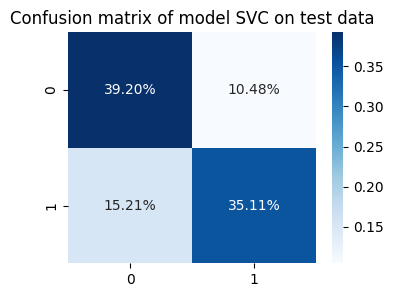

In [55]:
#Model performance
utils.report_model_performances(y_train, y_train_predicted, y_test, y_test_predicted, model_name = "SVC")

#### XGBoost

In [83]:
#Grid search parameters
grid_param = {"learning_rate": [0.08, 0.09, 0.1, 0.2, 0.3],
               "n_estimators": [117, 118, 119, 120, 121, 122, 123 ],
               "max_depth": [9, 10, 11, 12]}

In [84]:
#Apply grid search
grid_search = GridSearchCV(estimator = XGBClassifier(), param_grid = grid_param, cv = 5, verbose = 3, scoring = "f1")
logging.info(f"Runing Grid Search for estimator: XGBClassifier, for the following parameters : {grid_param}")
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 140 candidates, totalling 700 fits
[CV 1/5] END learning_rate=0.08, max_depth=9, n_estimators=117;, score=0.853 total time=   4.9s
[CV 2/5] END learning_rate=0.08, max_depth=9, n_estimators=117;, score=0.856 total time=   4.5s
[CV 3/5] END learning_rate=0.08, max_depth=9, n_estimators=117;, score=0.856 total time=   4.6s
[CV 4/5] END learning_rate=0.08, max_depth=9, n_estimators=117;, score=0.852 total time=   4.5s
[CV 5/5] END learning_rate=0.08, max_depth=9, n_estimators=117;, score=0.858 total time=   4.7s
[CV 1/5] END learning_rate=0.08, max_depth=9, n_estimators=118;, score=0.853 total time=   4.8s
[CV 2/5] END learning_rate=0.08, max_depth=9, n_estimators=118;, score=0.856 total time=   4.7s
[CV 3/5] END learning_rate=0.08, max_depth=9, n_estimators=118;, score=0.856 total time=   4.8s
[CV 4/5] END learning_rate=0.08, max_depth=9, n_estimators=118;, score=0.852 total time=   4.8s
[CV 5/5] END learning_rate=0.08, max_depth=9, n_estimators=118;, score=0.

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.08, 0.09, 0.1, 0.2, 0.3],
                         'max_depth': [9, 10, 11, 12],
                         'n_estimators': [117, 118, 119, 120, 121, 122, 123]},
             scoring='f1', verbose=3)

In [86]:
#Grid search best params
print ("The best arguments combination is :")
grid_best_params = grid_search.best_params_
logging.info(f"Grid best combination : {grid_best_params}")
print (grid_best_params) 

The best arguments combination is :
{'learning_rate': 0.1, 'max_depth': 12, 'n_estimators': 122}


In [95]:
setup_log = setup_logger("grid_search")
setup_log.info(f"Runing Grid Search for estimator: XGBClassifier, for the following parameters : {grid_param}")
setup_log.info(f"Grid best combination : {grid_best_params}")

In [87]:
params = {
    'objective': 'binary:logistic',   # Binary classification
    'eval_metric': 'logloss',         # Logarithmic loss for binary classification
    'max_depth': grid_best_params["max_depth"],                   # Maximum depth of a tree (adjust based on your dataset)
    'n_estimators': grid_best_params["n_estimators"],             # Number of boosting rounds (trees)
    'learning_rate': grid_best_params["learning_rate"]
} 

In [88]:
#Train model
XGB_MODEL = XGBClassifier(**params)
XGB_MODEL.fit(x_train, y_train)
XGB_MODEL

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=12,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=122,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [89]:
#Predictions
y_test_predicted = XGB_MODEL.predict(x_test)
y_train_predicted = XGB_MODEL.predict(x_train)

                  training data   ||   test data
------------------------------------------------------------
 accuracy    : 0.9644679970572007  ||  0.8648741222812125
 precision   : 0.9652193836636499  ||  0.9028871391076115
 recall      : 0.9640045766590389  ||  0.8196051735874744
 f1 score    : 0.9646115976873318  ||  0.8592328278322926
-------------------------------------------------------------


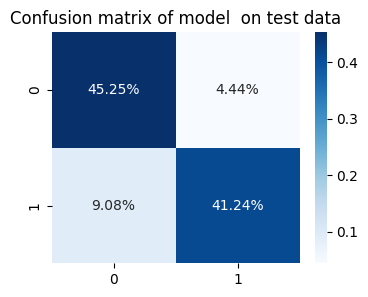

In [96]:
#Visualize model performance
utils.report_model_performances(y_train, y_train_predicted, y_test, y_test_predicted, model_name = "XGBoostClassifier")

#### Random Forest

In [99]:
grid_param = { "n_estimators": [80, 100, 120], 
               "max_depth":[5, 7, 10], 
                "min_samples_split":  [2, 5, 9],
                "min_samples_leaf": [1, 2, 3]}

In [100]:
grid_search = GridSearchCV(estimator = RandomForestClassifier(), param_grid = grid_param, cv = 3, verbose = 3, scoring = "f1" )
setup_log = setup_logger("grid_search")
setup_log.info(f"Runing Grid Search for estimator: Random Forest, for the following parameters : {grid_param}")
grid_search.fit(x_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.825 total time=   9.6s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.831 total time=   9.8s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=80;, score=0.826 total time=   9.7s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.825 total time=  12.1s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.828 total time=  12.1s
[CV 3/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=100;, score=0.826 total time=  12.0s
[CV 1/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=120;, score=0.827 total time=  14.4s
[CV 2/3] END max_depth=5, min_samples_leaf=1, min_samples_split=2, n_estimators=120;, score=0.826 total time=  14.4s
[CV 3

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 7, 10], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 5, 9],
                         'n_estimators': [80, 100, 120]},
             scoring='f1', verbose=3)

In [101]:
grid_best_params = grid_search.best_params_
#Keep track of logs
setup_log = setup_logger("grid_search")
setup_log.info(f"Grid best combination : {grid_best_params}")
print ("Best params combination :")
print (grid_best_params)

Best params combination :
{'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 80}


In [102]:
#Train model
RANDOM_FOREST_MODEL = RandomForestClassifier(**grid_best_params)
RANDOM_FOREST_MODEL.fit(x_train, y_train)
RANDOM_FOREST_MODEL

RandomForestClassifier(max_depth=10, min_samples_split=9, n_estimators=80)

In [103]:
#Predictions
y_test_predicted = RANDOM_FOREST_MODEL.predict(x_test)
y_train_predicted = RANDOM_FOREST_MODEL.predict(x_train)

                  training data   ||   test data
------------------------------------------------------------
RANDOM_FOREST accuracy    : 0.8692523450432224  ||  0.8511731460866587
RANDOM_FOREST precision   : 0.9146698137410847  ||  0.8952999617883072
RANDOM_FOREST recall      : 0.8158352402745995  ||  0.7974812797821648
RANDOM_FOREST f1 score    : 0.8624301507051453  ||  0.8435643564356435
-------------------------------------------------------------


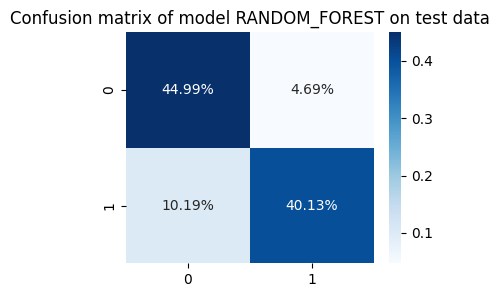

In [104]:
#Visualize model performance
utils.report_model_performances(y_train, y_train_predicted, y_test, y_test_predicted, model_name = "RANDOM_FOREST")